In [1]:
library(MASS)
library(cluster) # for k-means and k-mediods
library(clusterSim) # for data.Normalization

library(e1071) # for C-means

In [2]:
data(iris)
iris.nm <- data.Normalization(iris[, -5], type="n4", normalization="column")

# K-means method

In [3]:
# 使用K-means
result.km <- kmeans(iris[, -5], center=3)
print(result.km)

# K-means 質心位置(Cluster means)
# result.km$centers

K-means clustering with 3 clusters of sizes 38, 62, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.901613    2.748387     4.393548    1.433871
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

Within cluster sum of squares by cluster:
[1] 23.87947 39.82097 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [4]:
# K-means聚類的效果
table(iris$Species, result.km$cluster)

            
              1  2  3
  setosa      0  0 50
  versicolor  2 48  0
  virginica  36 14  0

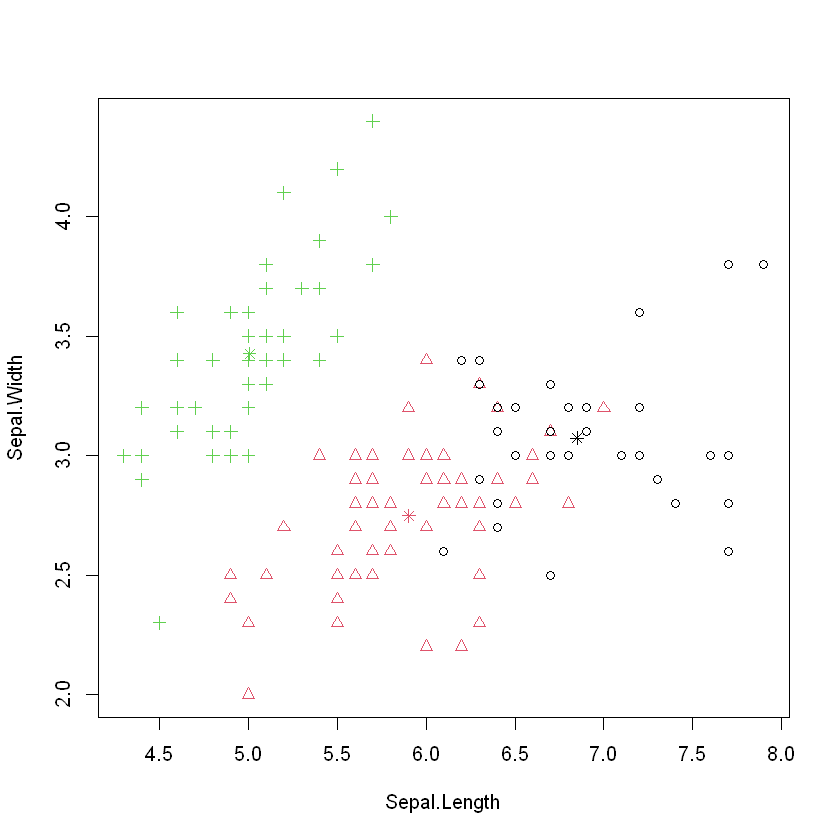

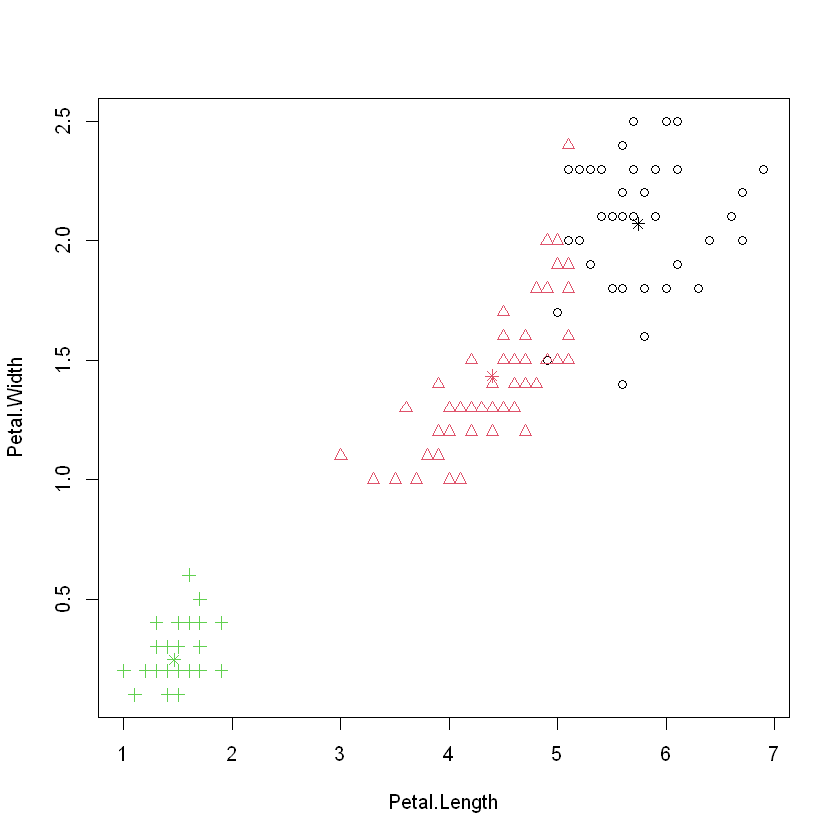

In [5]:
# 可視化 依照Sepal -> iris[,1:2], 依照Petal -> iris[,3:4]
plot(iris[,1:2], pch=result.km$cluster, col=result.km$cluster)
points(result.km$centers[,1:2], col=1:3, pch=8)

plot(iris[,3:4], pch=result.km$cluster, col=result.km$cluster)
points(result.km$centers[,3:4], col=1:3, pch=8)

In [6]:
# 計算最佳分類群數
min.nc <- 2
max.nc <- 8
bias <- min.nc-1

KM=array(0, c(max.nc-min.nc+1, 2))
for (nc in min.nc : max.nc)
    { 
     fitkm <- kmeans(iris[, -5], center=nc)
     # (WSS <- km$tot.withinss, BSS <- km$betweenss, TSS <- BSS + WSS)
     KM[nc-bias, 1] <- fitkm$tot.withinss/ (fitkm$betweenss + fitkm$tot.withinss)
     KM[nc-bias, 2] <- index.DB(iris[,-5], fitkm$cluster, centrotypes="centroids", p=2)$DB
    }

#輸出效果最佳的聚類種類數
cat('The better cluster number by WSS/TSS:',
    which(KM[,1]==max(KM[,1]))+bias)

cat('\nThe better cluster number by centroids:',
    which(KM[,2]==min(KM[,2]))+bias)

The better cluster number by WSS/TSS: 2
The better cluster number by centroids: 2

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


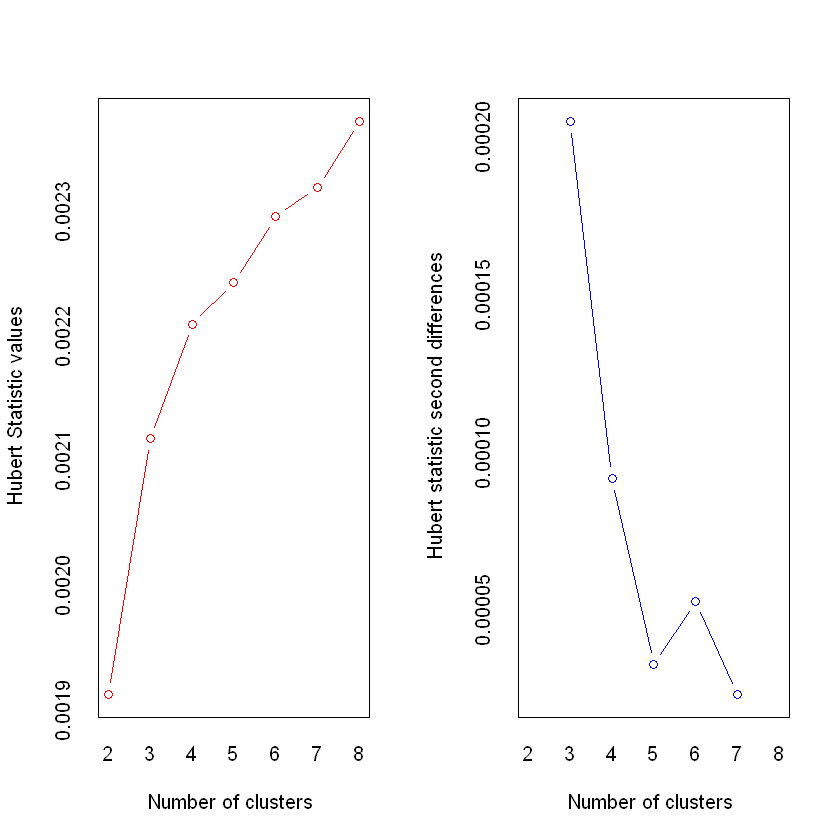

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


$All.index
       KL       CH Hartigan     CCC    Scott  Marriot    TrCovW   TraceW
2  5.9068 513.9245 137.9491 35.9428 1044.605 467371.6 1045.9696 152.3480
3 12.4890 561.6278  15.2384 37.6701 1246.668 273408.6  248.9814  78.8514
4  0.2006 415.4655  63.3643 33.4414 1296.511 348642.4  221.8632  71.4452
5  4.2008 459.5058  25.2963 34.3409 1415.662 246163.9  140.6758  49.8223
6  2.0868 433.7827   6.3415 33.3853 1505.840 194309.4   79.9311  42.4215
7  0.2423 375.8334  34.3200 31.4378 1523.492 235115.0   74.1212  40.6322
8  1.8336 401.5324  23.0039 32.0912 1607.479 175426.3   54.5852  32.7679
   Friedman    Rubin Cindex     DB Silhouette   Duda Pseudot2   Beale Ratkowsky
2  732.8086  62.6152 0.2728 0.4744     0.6810 1.9253 -52.8667 -1.1380    0.5462
3  801.6490 120.9780 0.3450 0.7256     0.5528 0.5112  45.9014  2.2615    0.4967
4  850.7642 133.5189 0.3485 0.9484     0.4152 0.5870  46.4403  1.6709    0.4440
5  936.2996 191.4664 0.3327 0.9987     0.3728 1.0842  -3.8046 -0.1814    0.4067
6 1070.5134 224.8690 0.3596 1.0808     0.3357 1.0328  -1.1759 -0.0739    0.3733
7 1086.0457 234.7718 0.3614 1.1374     0.2935 1.2705  -7.2384 -0.4949    0.3481
8 1298.5148 291.1170 0.3830 1.1072     0.3121 0.6969  10.4369  1.0042    0.3301
     Ball Ptbiserial     Frey McClain   Dunn Hubert SDindex Dindex   SDbw
2 76.1740     0.8345   1.7571  0.2723 0.0765 0.0019  1.2319 0.8556 0.1618
3 26.2838     0.7146 -20.7325  0.5255 0.0988 0.0021  1.6973 0.6480 0.2257
4 17.8613     0.6250   1.0780  0.7275 0.0528 0.0022  3.0992 0.6055 0.2351
5  9.9645     0.5521   1.3588  0.9903 0.0624 0.0022  3.1825 0.5148 0.1542
6  7.0703     0.5034 -11.9269  1.2043 0.0739 0.0023  3.3461 0.4811 0.1149
7  5.8046     0.4724   0.4676  1.3897 0.0739 0.0023  4.4801 0.4693 0.0903
8  4.0960     0.4566   0.5934  1.4577 0.0869 0.0024  4.6264 0.4269 0.0716

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2         0.5633            85.2756       1.0000
3         0.5551            38.4707       0.0640
4         0.5842            46.9673       0.1574
5         0.4837            52.3097       1.0000
6         0.4590            43.6093       1.0000
7         0.4590            40.0734       1.0000
8         0.4284            32.0211       0.4098

$Best.nc
                    KL       CH Hartigan     CCC    Scott  Marriot   TrCovW
Number_clusters  3.000   3.0000   3.0000  3.0000   3.0000      3.0   3.0000
Value_Index     12.489 561.6278 122.7107 37.6701 202.0631 269196.9 796.9882
                 TraceW Friedman   Rubin Cindex     DB Silhouette   Duda
Number_clusters  3.0000   8.0000   3.000 2.0000 2.0000      2.000 2.0000
Value_Index     66.0903 212.4691 -45.822 0.2728 0.4744      0.681 1.9253
                PseudoT2  Beale Ratkowsky    Ball PtBiserial   Frey McClain
Number_clusters   2.0000  2.000    2.0000  3.0000     2.0000 2.0000  2.0000
Value_Index     -52.8667 -1.138    0.5462 49.8902     0.8345 1.7571  0.2723
                  Dunn Hubert SDindex Dindex   SDbw
Number_clusters 3.0000      0  2.0000      0 8.0000
Value_Index     0.0988      0  1.2319      0 0.0716

$Best.partition
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

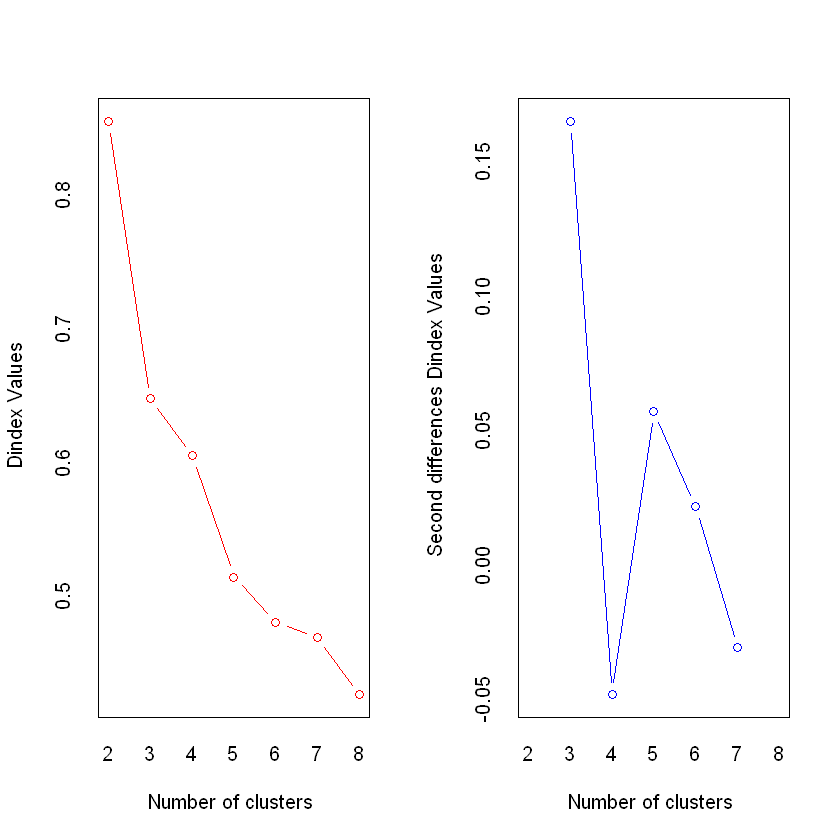

In [7]:
# 可用NbClust得出 Hubert index的二階導數來確認分類群數的拐點

library(NbClust)
NbClust(iris[,-5], distance="euclidean", min.nc=2, max.nc=8, method="kmeans", index="all")
# 如圖可知分2,3或6類較好

# K-medoids method

In [8]:
# 計算最佳分類群數
PM <- array(0, c(max.nc-bias,2))
for (nc in min.nc : max.nc)
    {
     fitpm <- pam(iris[,-5], nc)
     PM[nc-bias, 1] <- index.DB(iris[,-5], fitpm$clustering, centrotypes="centroids", p=2)$DB
     PM[nc-bias, 2] <- index.DB(iris[,-5], fitpm$clustering, dist(iris[,-5]), centrotypes="medoids", p=2)$DB
    }

cat('The better cluster number by centroids:',
    which(PM[,1]==min(PM[,1]))+bias)
cat('\nThe better cluster number by medoids:',
    which(PM[,2]==min(PM[,2]))+bias)

The better cluster number by centroids: 2
The better cluster number by medoids: 2

In [9]:
# 使用K-medoids
result.pam <- pam(iris[,-5], 3)
print(result.pam)

#中心位置
# result.pam$medoids

Medoids:
      ID Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]   8          5.0         3.4          1.5         0.2
[2,]  79          6.0         2.9          4.5         1.5
[3,] 113          6.8         3.0          5.5         2.1
Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2
Objective function:
    build      swap 
0.6709391 0.6542077 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      


In [10]:
# K-medoids聚類的效果
table(iris$Species, result.pam$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

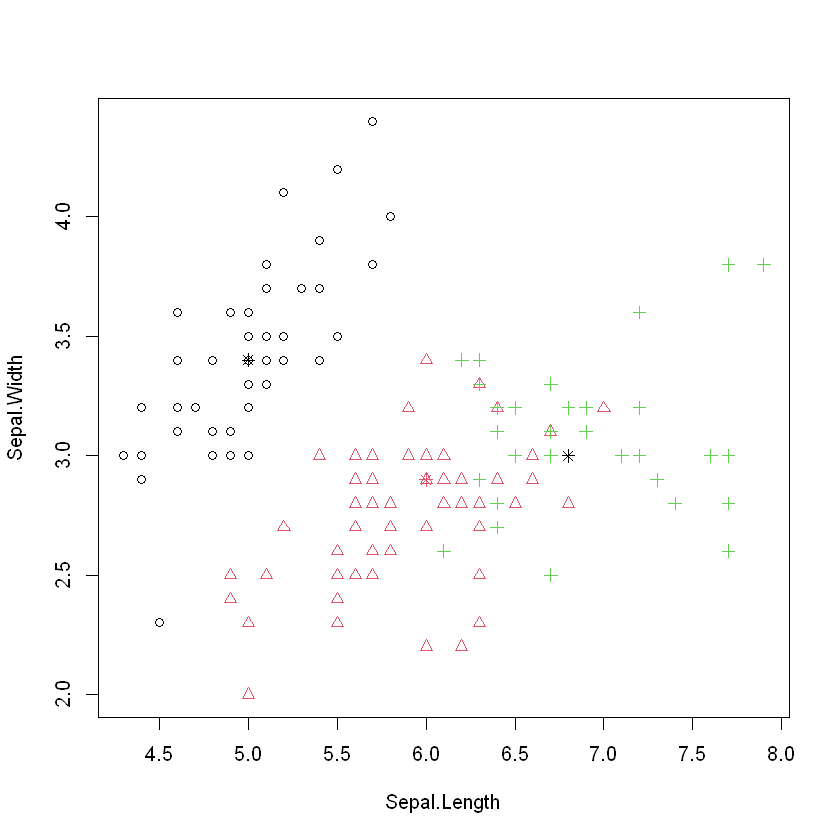

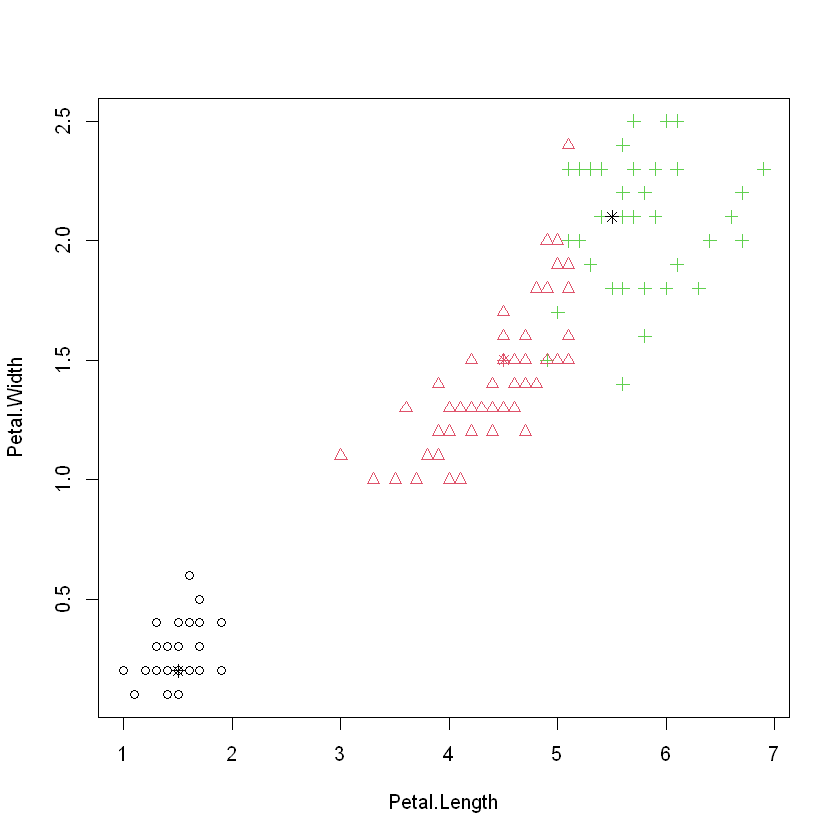

In [11]:
# 可視化 依照Sepal -> iris[,1:2], 依照Petal -> iris[,3:4]
plot(iris[,1:2], pch=result.pam$cluster, col=result.pam$cluster)
points(result.pam$medoids[,1:2], col=1:2, pch=8)

plot(iris[,3:4], pch=result.pam$cluster, col=result.pam$cluster)
points(result.pam$medoids[,3:4], col=1:2, pch=8)

# C-means method

In [12]:
# 計算最佳分類群數
CM = array(0, c(max.nc-bias, 2))
for (nc in min.nc : max.nc)
{ 
  fitcm <- cmeans(iris[,-5], centers=nc, m=2, method="cmeans")
  CM[nc-bias, 1] <- fclustIndex(fitcm, iris[,-5], index="xie.beni")
  CM[nc-bias, 2] <- fclustIndex(fitcm, iris[,-5], index="fukuyama.sugeno")
}


cat('The better cluster number by Xie.Beni index:',
    which(CM[,1]==min(CM[,1]))+bias)
cat('\nThe better cluster number by Fukuyama.Sugeno index:',
    which(CM[,2]==min(CM[,2]))+bias)

The better cluster number by Xie.Beni index: 2
The better cluster number by Fukuyama.Sugeno index: 2

In [13]:
# 使用C-means
result.cm <- cmeans(iris[,-5], center=3, m=2, iter.max=200, method="cmeans") #verbose = F
print(result.cm)

# 中心位置
# result.cm$centers

Fuzzy c-means clustering with 3 clusters

Cluster centers:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.774945    3.052363     5.646699   2.0535148
2     5.003966    3.414092     1.482811   0.2535443
3     5.888878    2.761050     4.363872   1.3972738

Memberships:
                  1           2            3
  [1,] 0.0010720227 0.996623591 0.0023043860
  [2,] 0.0074983064 0.975851105 0.0166505885
  [3,] 0.0064148105 0.979824985 0.0137602044
  [4,] 0.0101079949 0.967425541 0.0224664643
  [5,] 0.0017679304 0.994470322 0.0037617480
  [6,] 0.0206204775 0.934571035 0.0448084876
  [7,] 0.0065047617 0.979490694 0.0140045442
  [8,] 0.0001412115 0.999547237 0.0003115519
  [9,] 0.0219033093 0.930376159 0.0477205320
 [10,] 0.0053418339 0.982721878 0.0119362883
 [11,] 0.0102012890 0.968040972 0.0217577388
 [12,] 0.0024311972 0.992136620 0.0054321826
 [13,] 0.0091775761 0.970638520 0.0201839044
 [14,] 0.0252368276 0.922966595 0.0517965777
 [15,] 0.0376327212 0.889755411 0.0726118674

In [14]:
# C-means聚類的效果
table(iris$Species, result.cm$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor  3  0 47
  virginica  37  0 13

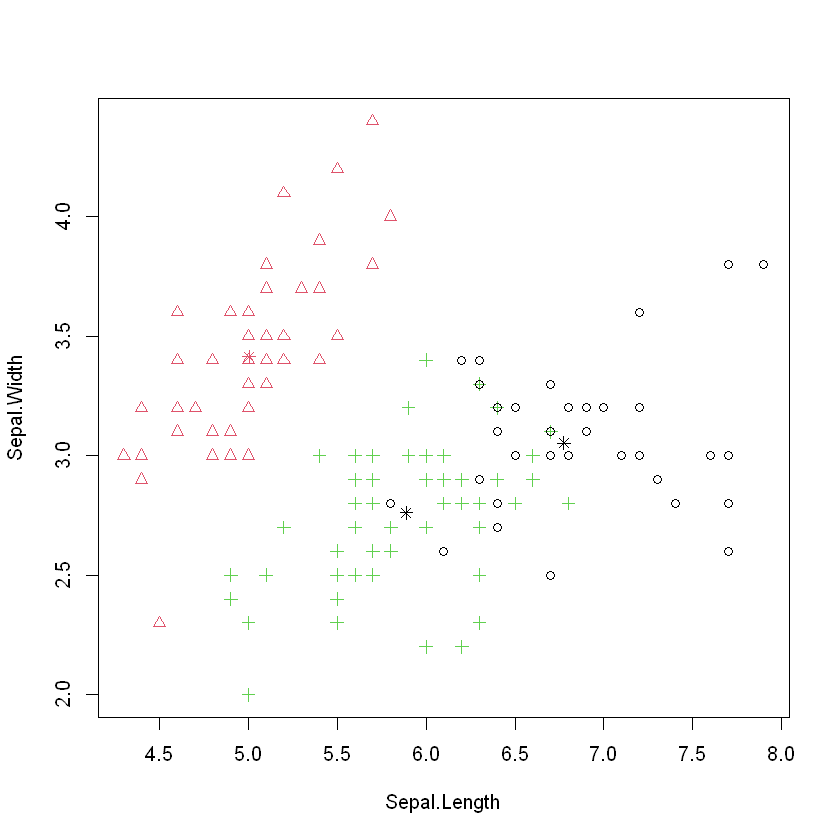

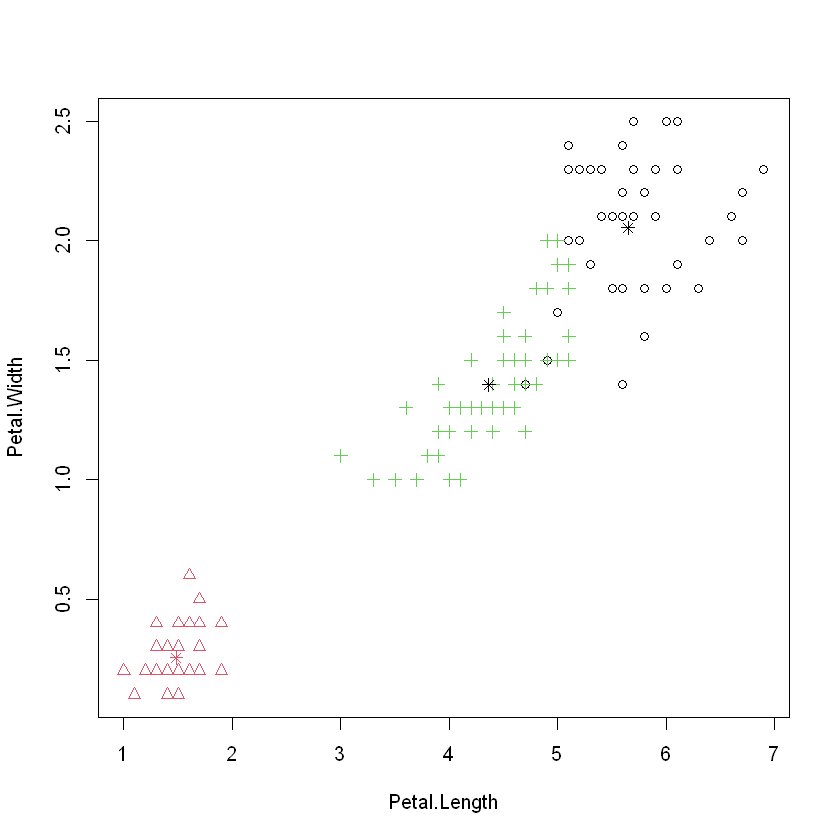

In [15]:
# 可視化 依照Sepal -> iris[,1:2], 依照Petal -> iris[,3:4]
plot(iris[,1:2], pch=result.cm$cluster, col=result.cm$cluster)
points(result.cm$centers[,1:2], col=1:2, pch=8)

plot(iris[,3:4], pch=(result.cm$cluster), col=result.cm$cluster)
points(result.cm$centers[,3:4], col=1:2, pch=8)